In [106]:
import pandas as pd 
import matplotlib as mpl
import seaborn
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import matplotlib.font_manager as fm
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우 기본 한글 폰트
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux나 기타
    plt.rc('font', family='NanumGothic')  # 설치 필요할 수도 있음



card_df=pd.read_csv('./CARD_SUBWAY_MONTH_202505.csv',index_col=False)

card_df


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20250501,분당선,야탑,17571,18765,20250504
1,20250501,8호선,석촌,6970,8042,20250504
2,20250501,분당선,서현,16548,17173,20250504
3,20250501,경부선,독산,8851,8507,20250504
4,20250501,경부선,수원,35103,38426,20250504
...,...,...,...,...,...,...
19134,20250531,과천선,선바위,6421,5197,20250603
19135,20250531,공항철도 1호선,영종,4658,5004,20250603
19136,20250531,공항철도 1호선,인천공항2터미널,10249,7316,20250603
19137,20250531,공항철도 1호선,인천공항1터미널,16395,15278,20250603


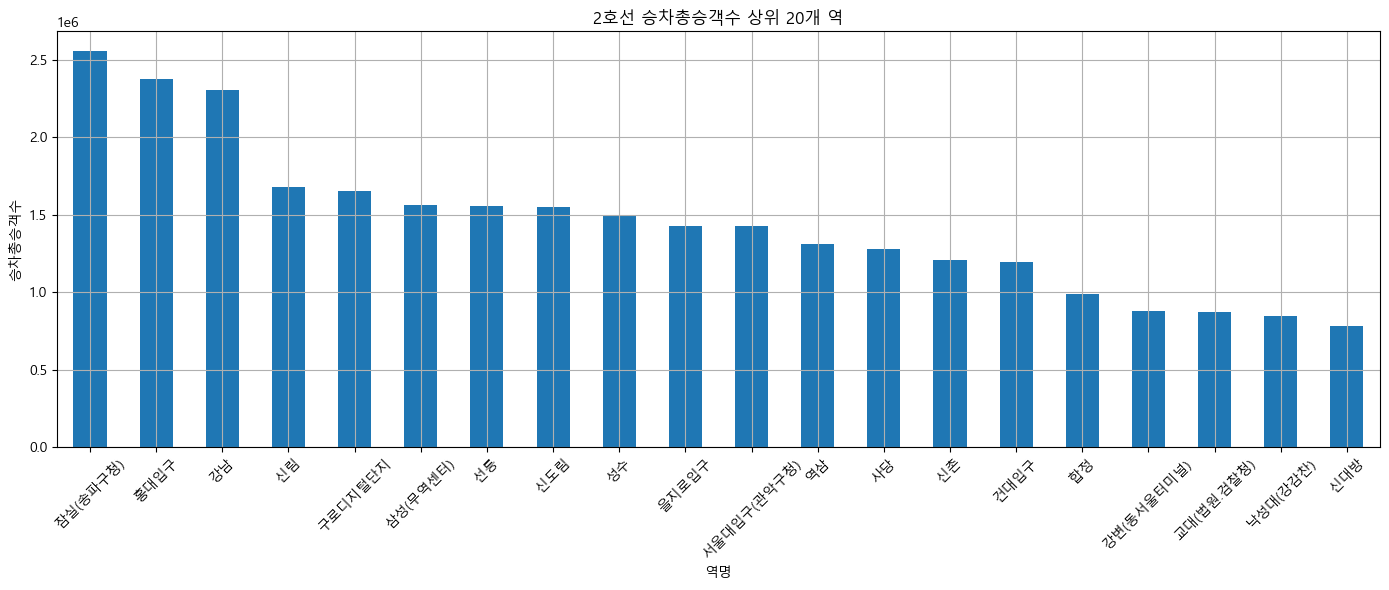

In [75]:
# 1. 먼저 2호선 데이터만 필터링
line2_data = card_df[card_df['노선명'] == '2호선']

# 2. 2호선 내에서 승차총승객수 합계를 역명 기준으로 집계
line2_station_totals = line2_data.groupby('역명')['승차총승객수'].sum().sort_values(ascending=False)

# 3. 상위 20개 역 추출
top20_line2 = line2_station_totals.head(20)

# 4. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
top20_line2.plot(kind='bar')
plt.title('2호선 승차총승객수 상위 20개 역')
plt.xlabel('역명')
plt.ylabel('승차총승객수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#다음과 같이 top20개의 역을 뽑아보면 대부분 환승역이지만 아닌곳도있다.


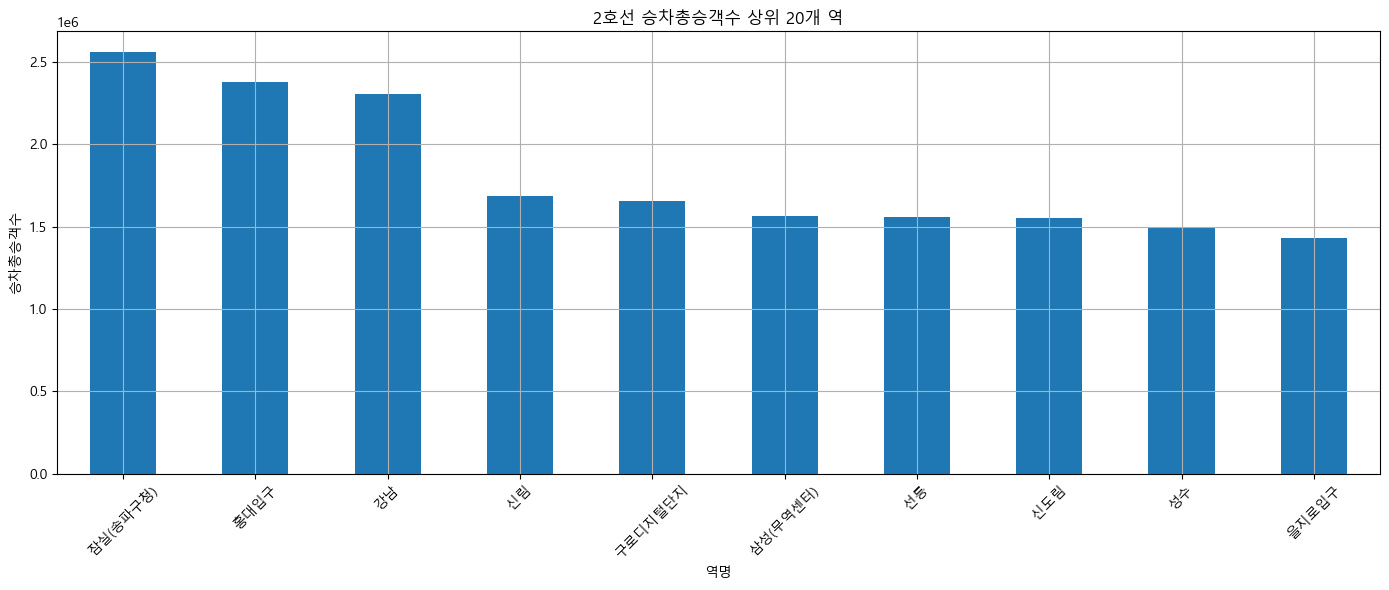

In [95]:
# 1. 먼저 2호선 데이터만 필터링
line2_data = card_df[card_df['노선명'] == '2호선']

# 2. 2호선 내에서 승차총승객수 합계를 역명 기준으로 집계
line2_station_totals = line2_data.groupby('역명')['승차총승객수'].sum().sort_values(ascending=False)

# 3. 상위 20개 역 추출
top20_line2 = line2_station_totals.head(10)

# 4. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
top20_line2.plot(kind='bar')
plt.title('2호선 승차총승객수 상위 20개 역')
plt.xlabel('역명')
plt.ylabel('승차총승객수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#구로디지털단지만 예외적으로 환승역이 아니다. 또한 주거지가 많은 곳이 아니기떄문에 출퇴근을 많이 하는 곳이라고 할 수 있다.

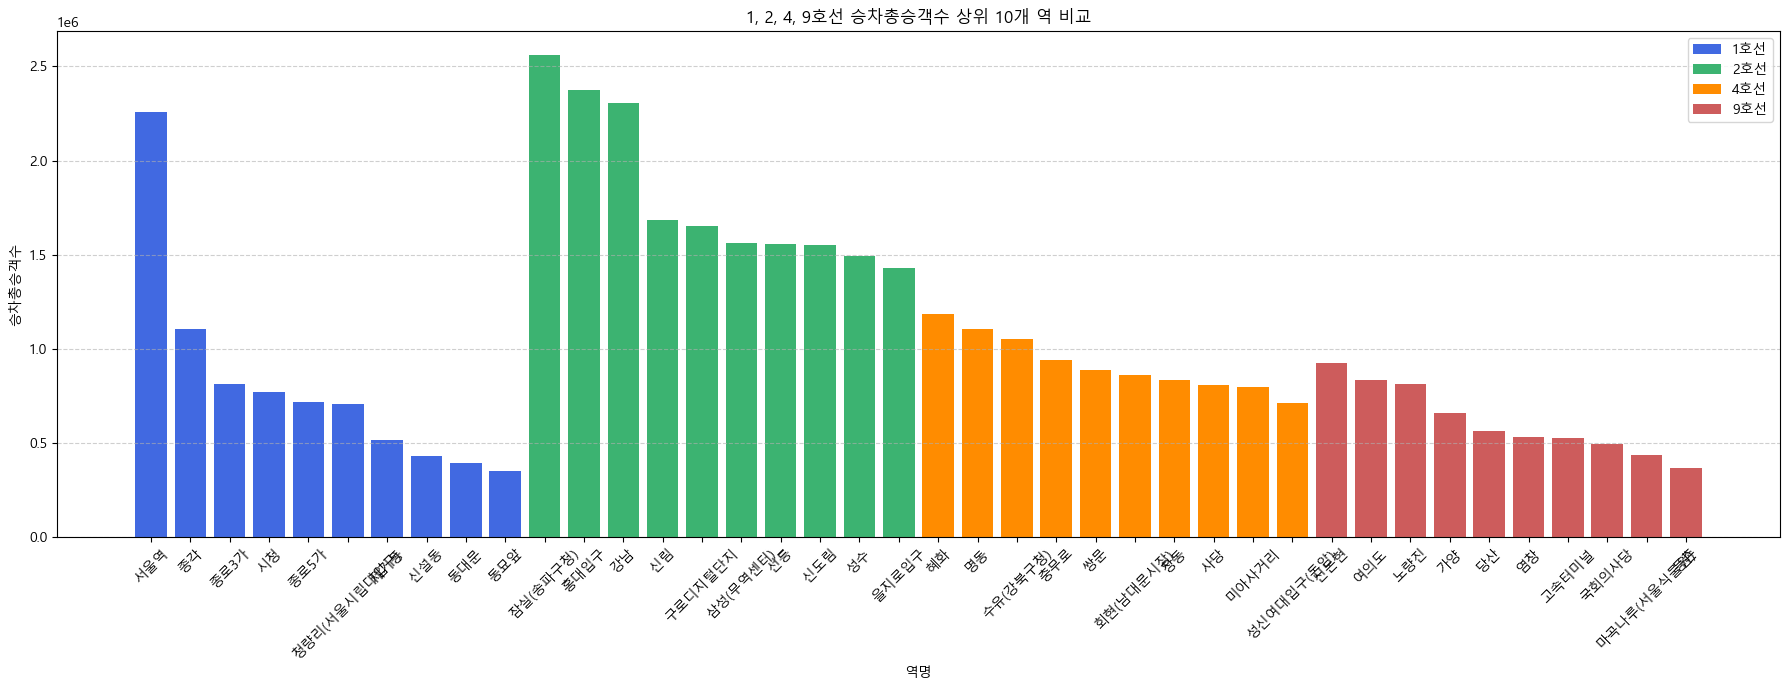

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 분석 대상 노선과 색상 지정
lines = ['1호선', '2호선', '4호선', '9호선']
colors = {'1호선': 'royalblue', '2호선': 'mediumseagreen', '4호선': 'darkorange', '9호선': 'indianred'}

# 각 노선별 상위 10개 역 추출 후 리스트에 저장
top10_all_lines = []

for line in lines:
    line_data = card_df[card_df['노선명'] == line]
    top10 = (
        line_data
        .groupby('역명')['승차총승객수']
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )
    top10['노선'] = line  # 노선 정보 추가
    top10_all_lines.append(top10)

# 통합 DataFrame 생성
result_df = pd.concat(top10_all_lines, ignore_index=True)

# 시각화
plt.figure(figsize=(18, 7))

for line in lines:
    subset = result_df[result_df['노선'] == line]
    plt.bar(subset['역명'], subset['승차총승객수'], label=line, color=colors[line])

plt.title('1, 2, 4, 9호선 승차총승객수 상위 10개 역 비교')
plt.xlabel('역명')
plt.ylabel('승차총승객수')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


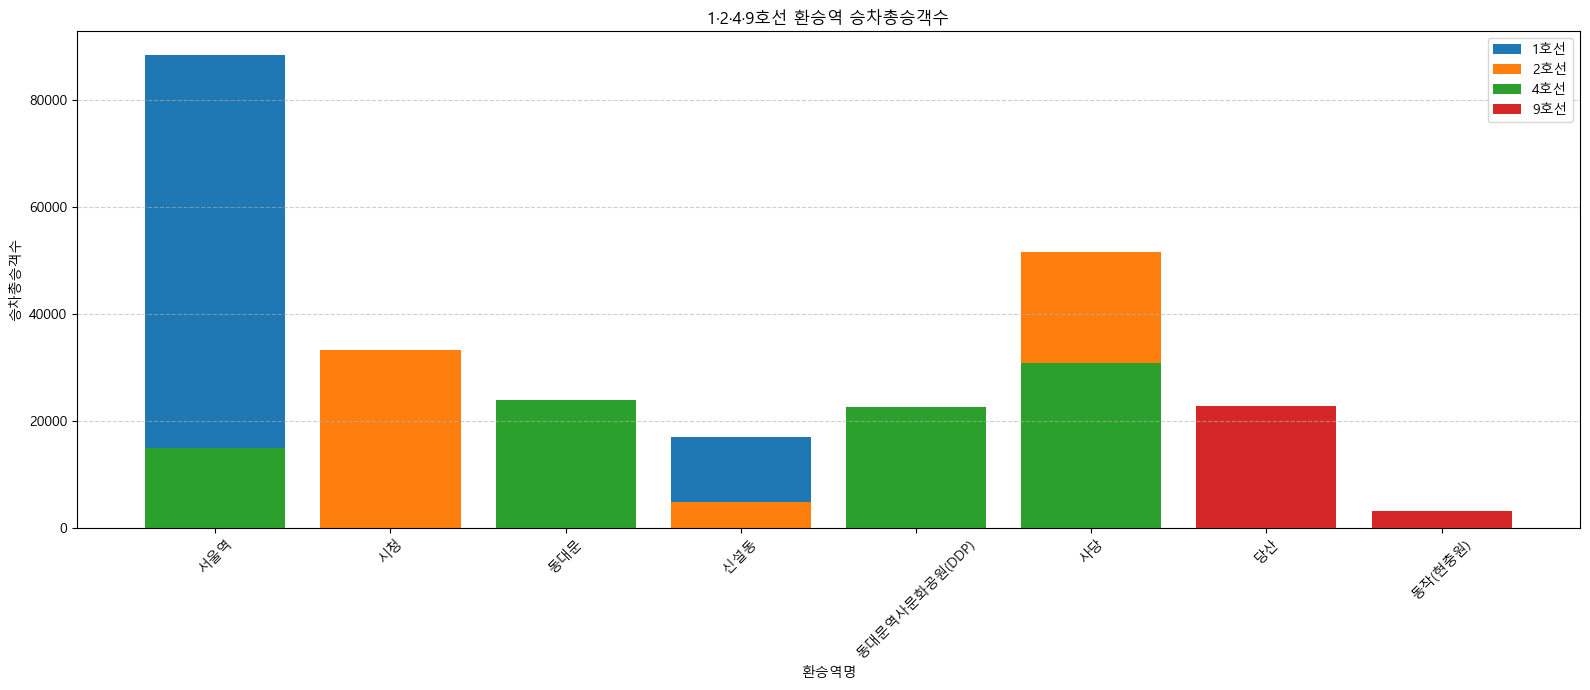

In [87]:
# 노선별 데이터 저장
lines = ['1호선', '2호선', '4호선', '9호선']
all_lines_df = []

for line in lines:
    temp = card_df[card_df['노선명'] == line][['역명', '승차총승객수']].copy()
    temp['노선'] = line
    all_lines_df.append(temp)

merged_df = pd.concat(all_lines_df, ignore_index=True)

# 역명 공백 제거
merged_df['역명'] = merged_df['역명'].str.strip()

# 중복되는 역명 찾기 (여러 노선에 걸쳐 등장한 역명)
duplicated_names = merged_df.groupby('역명')['노선'].nunique()
transfer_names = duplicated_names[duplicated_names > 1].index

# 환승역만 추출
transfer_df = merged_df[merged_df['역명'].isin(transfer_names)]

# 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(16, 7))
for line in lines:
    subset = transfer_df[transfer_df['노선'] == line]
    plt.bar(subset['역명'], subset['승차총승객수'], label=line)

plt.title('1·2·4·9호선 환승역 승차총승객수')
plt.xlabel('환승역명')
plt.ylabel('승차총승객수')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [88]:
## 위애서 역명이 중복된 것을 뽑아보면 다음과 같다.

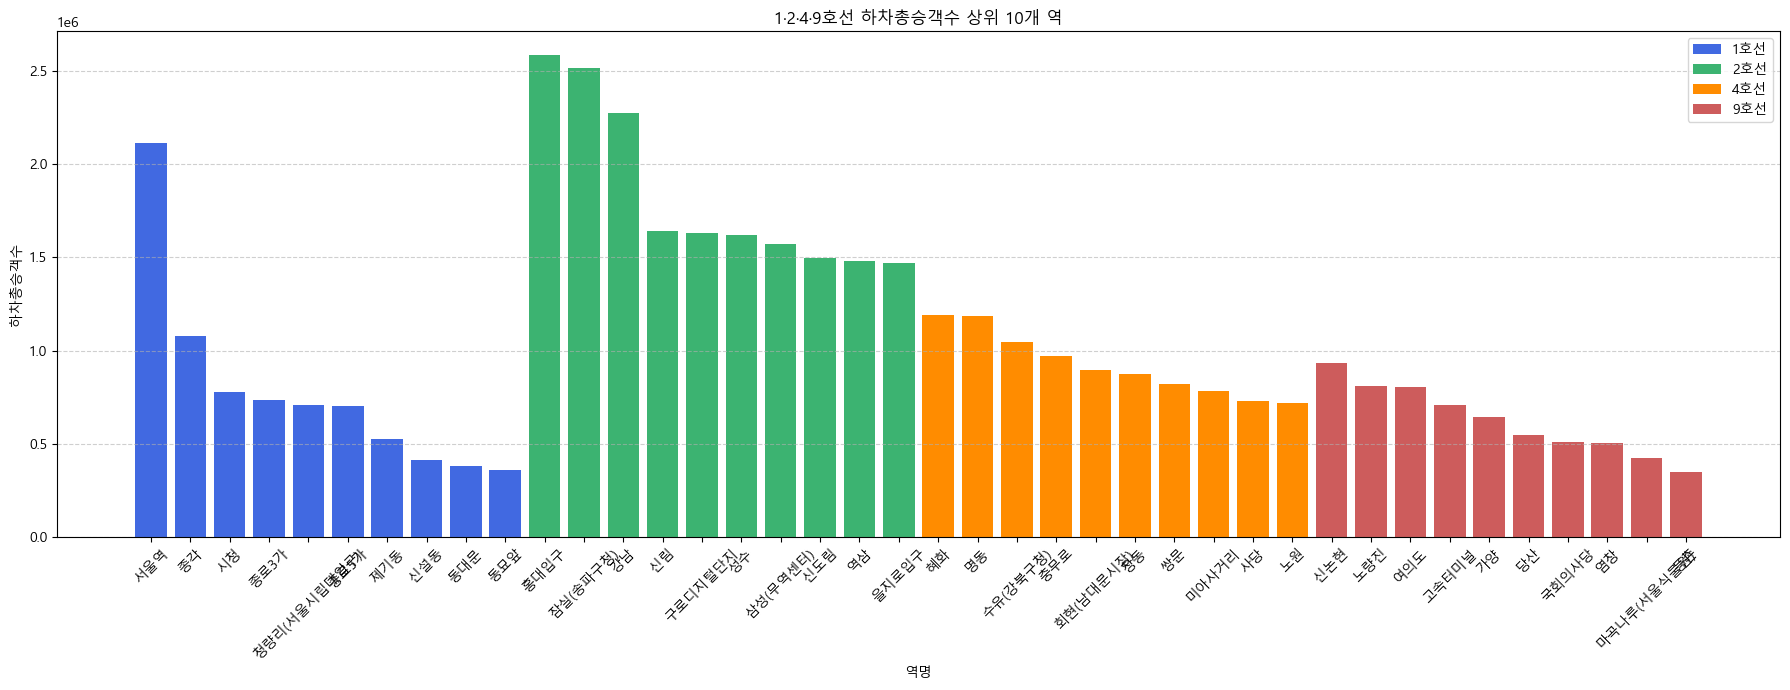

In [89]:
#하차역 기준으로는 다움과 같다.
lines = ['1호선', '2호선', '4호선', '9호선']
colors = {'1호선': 'royalblue', '2호선': 'mediumseagreen', '4호선': 'darkorange', '9호선': 'indianred'}

# 노선별 상위 10개 하차역 수집
top10_exit_all = []

for line in lines:
    line_data = card_df[card_df['노선명'] == line].copy()
    line_data['역명'] = line_data['역명'].str.strip()  # 혹시 모를 공백 제거
    top10 = (
        line_data
        .groupby('역명')['하차총승객수']
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )
    top10['노선'] = line
    top10_exit_all.append(top10)

# 통합된 데이터프레임 생성
exit_df = pd.concat(top10_exit_all, ignore_index=True)

# 시각화
plt.figure(figsize=(18, 7))
for line in lines:
    subset = exit_df[exit_df['노선'] == line]
    plt.bar(subset['역명'], subset['하차총승객수'], label=line, color=colors[line])

plt.title('1·2·4·9호선 하차총승객수 상위 10개 역')
plt.xlabel('역명')
plt.ylabel('하차총승객수')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


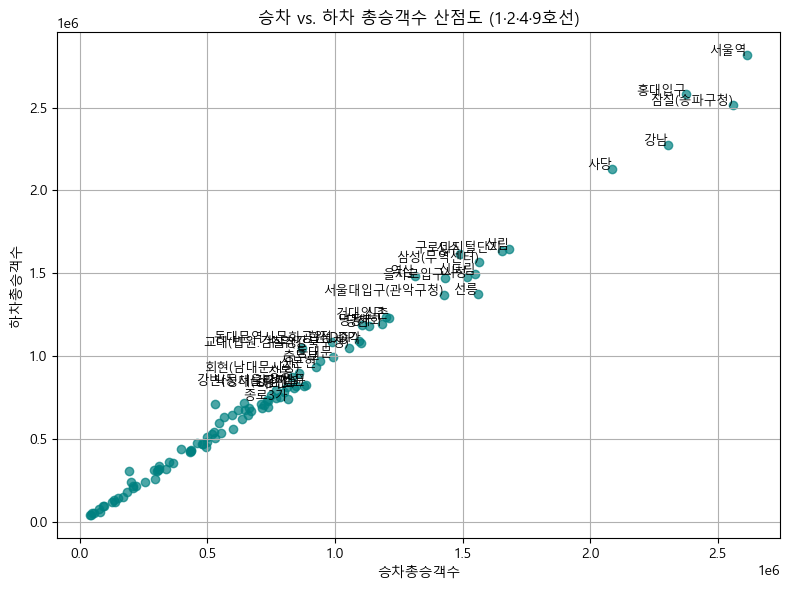

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. 분석할 노선 리스트
lines = ['1호선', '2호선', '4호선', '9호선']

# 2. 전체 노선에서 승차/하차 총계 계산
subway_data = (
    card_df[card_df['노선명'].isin(lines)]
    .groupby('역명')[['승차총승객수', '하차총승객수']]
    .sum()
    .reset_index()
)

# 3. 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(
    subway_data['승차총승객수'],
    subway_data['하차총승객수'],
    alpha=0.7,
    color='teal'
)

plt.title('승차 vs. 하차 총승객수 산점도 (1·2·4·9호선)')
plt.xlabel('승차총승객수')
plt.ylabel('하차총승객수')
plt.grid(True)

# 4. 특정 역 레이블 표시 (선택사항)
for _, row in subway_data.iterrows():
    if row['승차총승객수'] > 800000 or row['하차총승객수'] > 800000:
        plt.text(row['승차총승객수'], row['하차총승객수'], row['역명'],
                 fontsize=9, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
## 하차역과 승차역 총승객수를 산점도 그래프로 그려보면 정비례하여 두가지 중에 하나만 선택하여도 결과가 크게 달라지지 않는다.

C:\Users\Admin\AppData\Local\Temp\ipykernel_4896\3166090084.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(diff_offboard_totals.index, rotation=45, ha='right', fontsize=10)


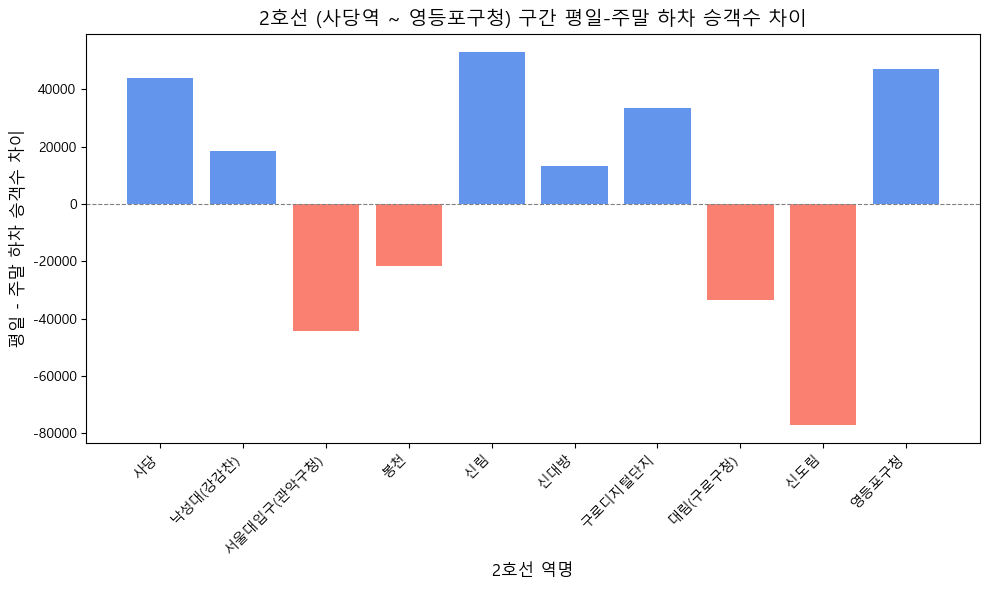


---
## 사당역 ~ 영등포구청 구간 평일-주말 하차 승객수 차이:
역명
사당             44000.0
낙성대(강감찬)       18500.0
서울대입구(관악구청)   -44500.0
봉천            -21500.0
신림             53000.0
신대방            13200.0
구로디지털단지        33500.0
대림(구로구청)      -33500.0
신도림           -77000.0
영등포구청          47000.0
Name: 하차총승객수, dtype: float64

참고: 양수 값은 평일 하차 승객수가 더 많음을, 음수 값은 주말 하차 승객수가 더 많음을 의미합니다.


In [179]:
import pandas as pd
import matplotlib.pyplot as plt

card_df = pd.DataFrame(data)

card_df['사용일자_dt'] = pd.to_datetime(card_df['사용일자'])
card_df['요일'] = card_df['사용일자_dt'].dt.dayofweek
card_df['구분'] = card_df['요일'].apply(lambda x: '평일' if x <= 4 else '주말')

# --- 2. 2호선 사당역-영등포구청 구간 데이터 필터링 및 집계 ---
line2_df = card_df[card_df['노선명'] == '2호선'].copy()

# 사용자가 제공한 정확한 역명 리스트 사용
target_stations_segment = [
    '사당', '낙성대(강감찬)', '서울대입구(관악구청)', '봉천', '신림', '신대방',
    '구로디지털단지', '대림(구로구청)', '신도림', '영등포구청'
]

filtered_line2_df = line2_df[line2_df['역명'].isin(target_stations_segment)]

weekday_df = filtered_line2_df[filtered_line2_df['구분'] == '평일']
weekend_df = filtered_line2_df[filtered_line2_df['구분'] == '주말']

weekday_offboard_totals = weekday_df.groupby('역명')['하차총승객수'].sum().reindex(target_stations_segment).fillna(0)
weekend_offboard_totals = weekend_df.groupby('역명')['하차총승객수'].sum().reindex(target_stations_segment).fillna(0)

# --- 3. 평일 - 주말 하차 승객수 차이 계산 ---
# '평일 하차 승객수' - '주말 하차 승객수'
diff_offboard_totals = weekday_offboard_totals - weekend_offboard_totals

# --- 4. 차이 도수분포표 그리기 ---
fig, ax = plt.subplots(figsize=(10, 6)) # 단일 그래프이므로 figsize 조정

# 막대 색상 설정: 평일이 많으면 파란색, 주말이 많으면 빨간색
bar_colors = ['cornflowerblue' if val >= 0 else 'salmon' for val in diff_offboard_totals.values]

ax.bar(diff_offboard_totals.index, diff_offboard_totals.values, color=bar_colors)
ax.set_title('2호선 (사당역 ~ 영등포구청) 구간 평일-주말 하차 승객수 차이', fontsize=14)
ax.set_xlabel('2호선 역명', fontsize=12)
ax.set_ylabel('평일 - 주말 하차 승객수 차이', fontsize=12)
ax.set_xticklabels(diff_offboard_totals.index, rotation=45, ha='right', fontsize=10)
ax.axhline(0, color='grey', linewidth=0.8, linestyle='--') # 0 기준선 추가

plt.tight_layout()
plt.show()

print("\n---")
print("## 사당역 ~ 영등포구청 구간 평일-주말 하차 승객수 차이:")
print(diff_offboard_totals)
print("\n참고: 양수 값은 평일 하차 승객수가 더 많음을, 음수 값은 주말 하차 승객수가 더 많음을 의미합니다.")